In [7]:
import os
import pickle
from glob import glob
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from utils import avg

results_dir = 'results'
lp_results_fns = glob(os.path.join(results_dir, '*_lp.p'))
sd_results_fns = [f.replace('lp.p', 'sd.p') for f in lp_results_fns]


e226


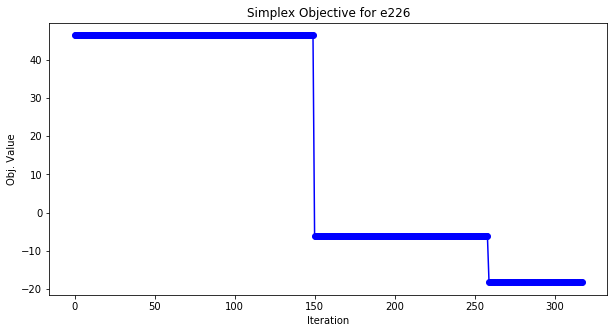

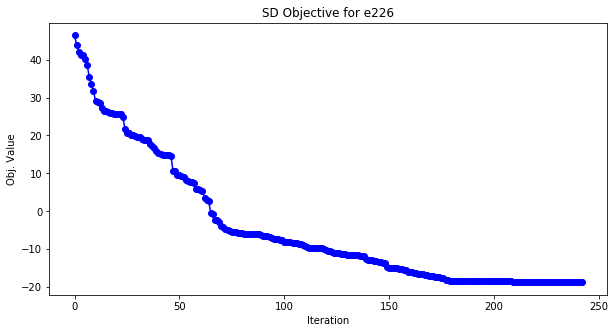






wood1p


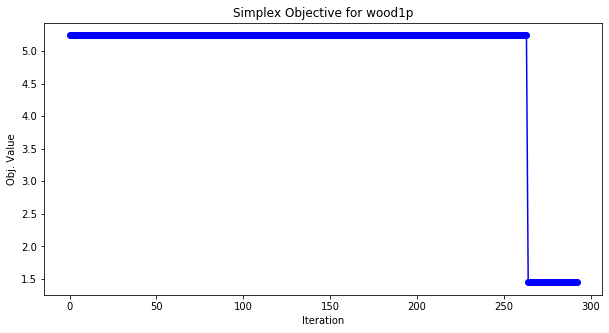

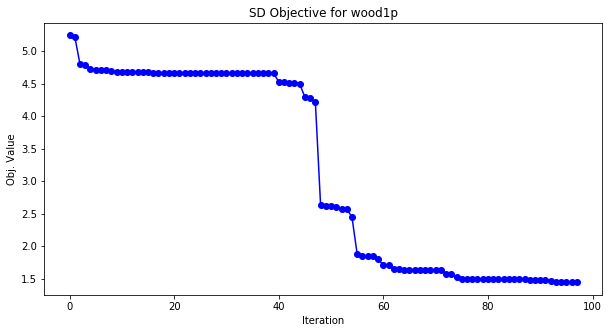






qap08


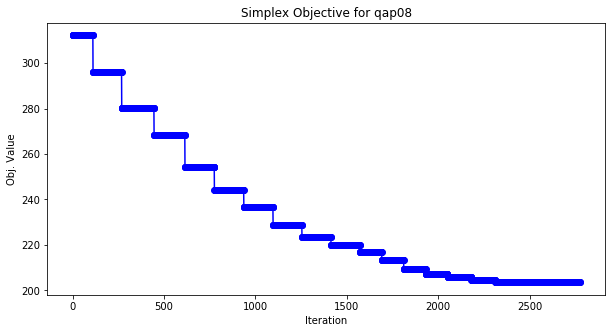

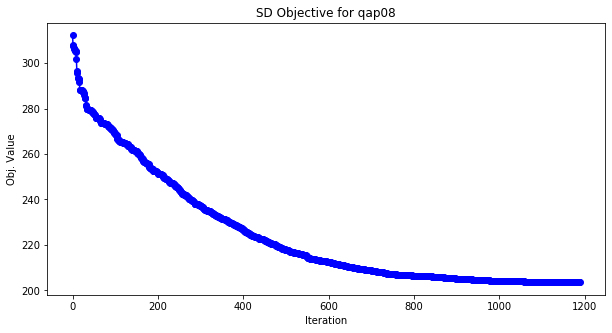






nesm


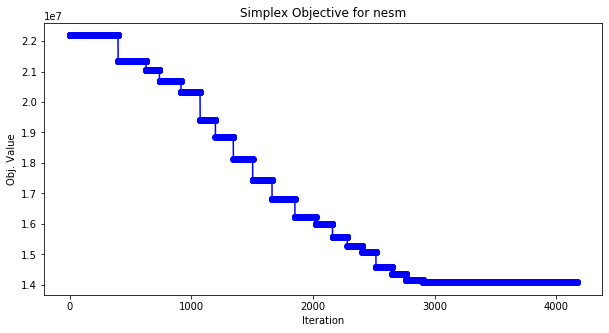

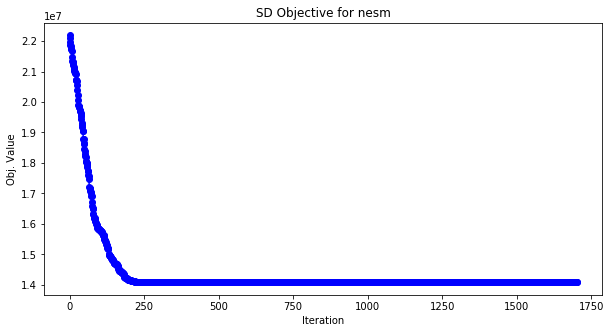






finnis


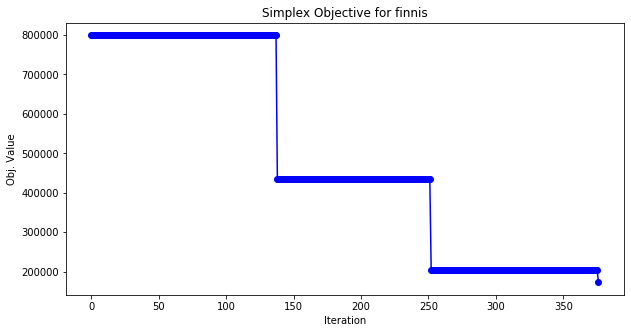

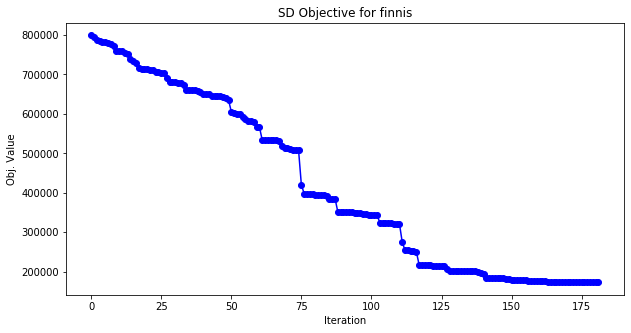

In [2]:
inds = [1,2,3,4,5]

for ind in inds:
    lp_fn = lp_results_fns[ind]
    sd_fn = sd_results_fns[ind]
    problem_name = os.path.basename(lp_fn).split('_')[0]
    print(problem_name)
    
    with open(lp_fn, 'rb') as f:
        lp_results = pickle.load(f)
    with open(sd_fn, 'rb') as f:
        sd_results = pickle.load(f)
        
    plt.figure(figsize=(10,5))
    plt.title('Simplex Objective for {}'.format(problem_name))
    plt.xlabel('Iteration')
    plt.ylabel('Obj. Value')
    plt.plot(list(range(len(lp_results['obj_values']))), lp_results['obj_values'], 'bo-')
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.title('SD Objective for {}'.format(problem_name))
    plt.xlabel('Iteration')
    plt.ylabel('Obj. Value')
    plt.plot(list(range(len(sd_results['obj_values']))), sd_results['obj_values'], 'bo-')
    plt.show()
    
    print('\n\n\n\n')
            
    

In [19]:
sd_results

{'obj': None,
 'obj_values': [],
 'n_iters': None,
 'solve_time_total': None,
 'alg_type': 'simplex'}

woodw
e226


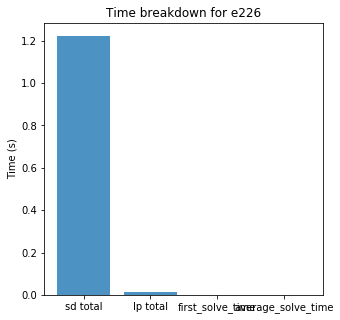




wood1p


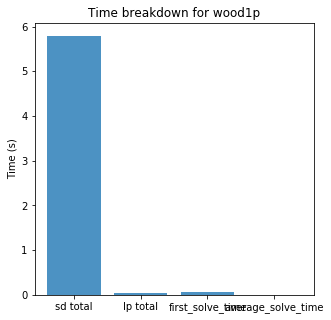




qap08


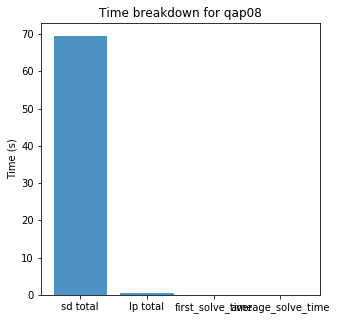




nesm
finnis


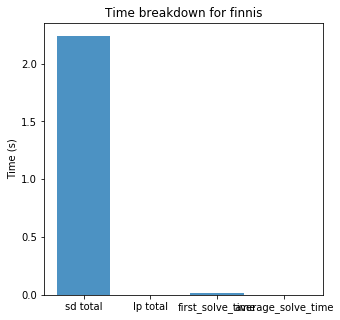

In [21]:
inds = [0,1,2,3,4,5]
good_probs = []
max_solve_time = 200

for ind in inds:
    lp_fn = lp_results_fns[ind]
    sd_fn = sd_results_fns[ind]
    problem_name = os.path.basename(lp_fn).split('_')[0]
    print(problem_name)
    
    with open(lp_fn, 'rb') as f:
        lp_results = pickle.load(f)
    with open(sd_fn, 'rb') as f:
        sd_results = pickle.load(f)
        
    if sd_results['solve_time_total'] is None:
        continue
    if sd_results['solve_time_total'] > max_solve_time:
        continue
        
    good_probs.append(problem_name)
        
    times = {}
    times['sd total'] = sd_results['solve_time_total']
    times['lp total'] = lp_results['solve_time_total']
    times['first_solve_time'] = sd_results['sove_times'][0]
    times['average_solve_time'] = avg(sd_results['sove_times'])
    
    time_types = [key for key in times]

    
    plt.figure(figsize=(5,5))
    plt.title('Time breakdown for {}'.format(problem_name))
    plt.ylabel('Time (s)')
    x_pos = np.arange(len(time_types))
    plt.xticks(x_pos, time_types)
    values = [times[key] for key in times]
    plt.bar(x_pos, values, align='center', alpha=0.8)
    plt.show()   
    
    print('\n\n')